##                                                   BigMart Sales Prediction

In [2]:
##########################
# IMPORTING LIBRARIES
##########################

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.preprocessing import LabelEncoder

In [3]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
df= pd.read_csv("Files/train_v9rqX0R.csv")

In [5]:
df.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [6]:
df.shape

(8523, 12)

In [7]:
df['Item_Identifier'].nunique()

1559

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
weight_missing= df['Item_Weight'].isna().sum()/df.shape[0]
size_missing= df['Outlet_Size'].isna().sum()/df.shape[0]

print("Missing in Item_Weight: ", weight_missing)
print("Missing in Outlet_Size: ", size_missing)

Missing in Item_Weight:  0.1716531737651062
Missing in Outlet_Size:  0.2827642848762173


In [11]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [12]:
num_cols= ['Item_Weight', 'Item_Visibility', 'Item_MRP']
cat_cols= ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Establishment_Year', 
           'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
y= 'Item_Outlet_Sales'

### Exploratory Data Analysis

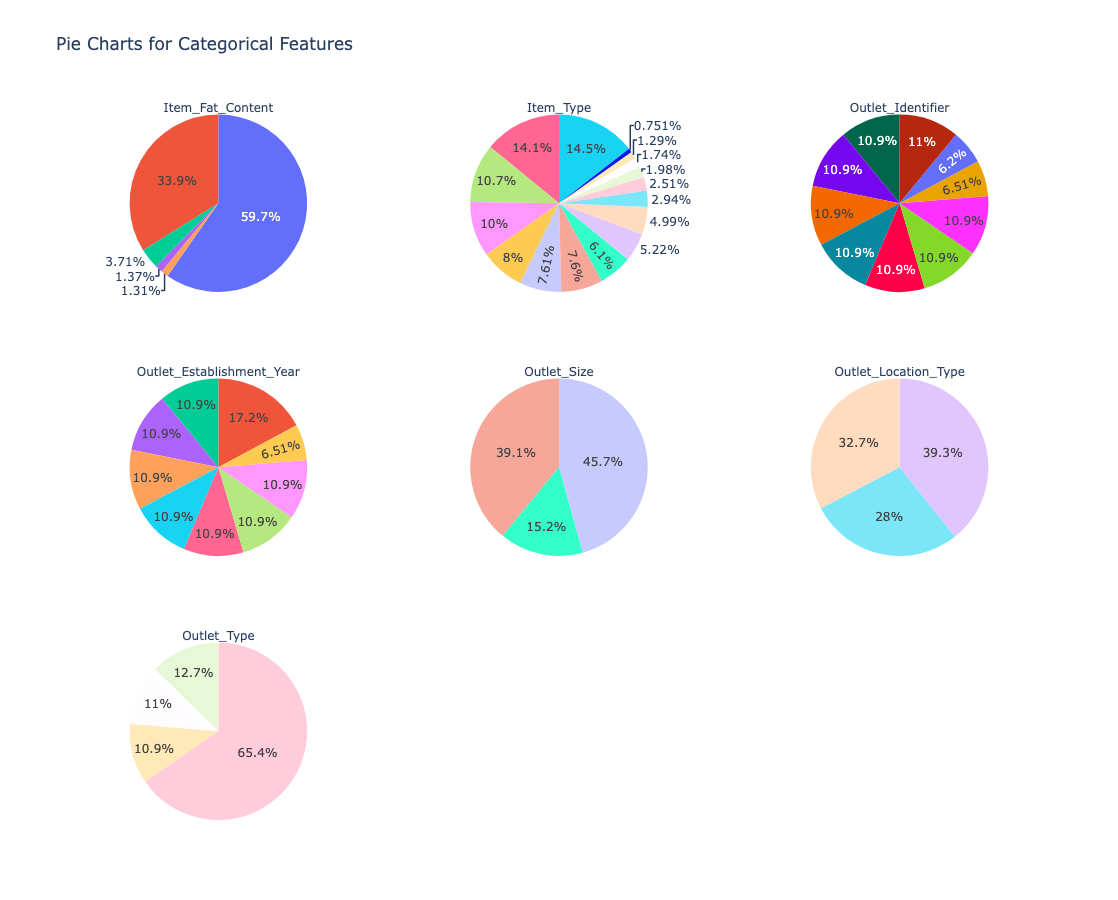

In [14]:
num_charts = len(cat_cols)

# Create subplot figure with 1 row, num_charts columns
# Create subplots
fig = make_subplots(rows=3, cols=3, specs=[[{'type':'domain'}]*3]*3)

# Add pie charts
for idx, col in enumerate(cat_cols):
    row = idx // 3 + 1
    col_pos = idx % 3 + 1
    counts = df[col].value_counts()
    fig.add_trace(
        go.Pie(labels=counts.index, values=counts.values, name=col, title= col, showlegend= False),
        row=row, col=col_pos
    )

# Update layout
fig.update_layout(
    height=900, width=900,
    title_text="Pie Charts for Categorical Features"
)

fig.show()


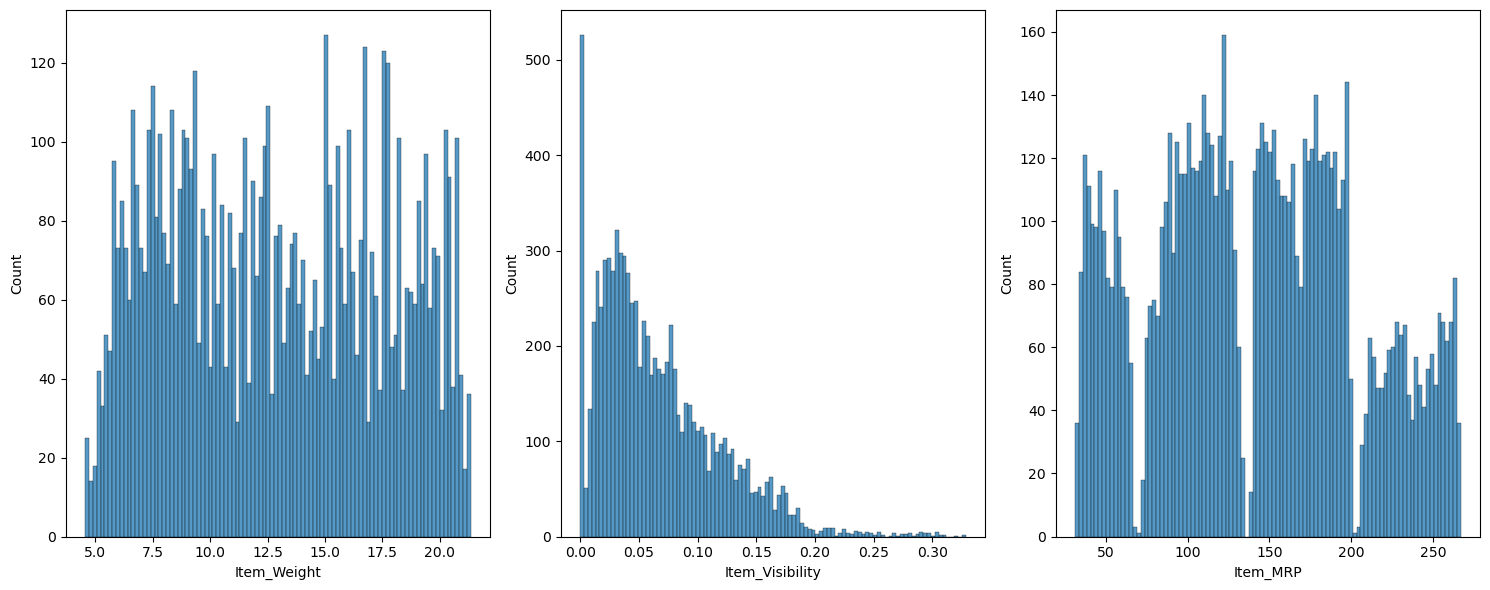

In [15]:
plt.figure(figsize=(15, 6))

for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 3, i) 
    sns.histplot(x= col, data= df, bins= 100)

plt.tight_layout()
plt.show()

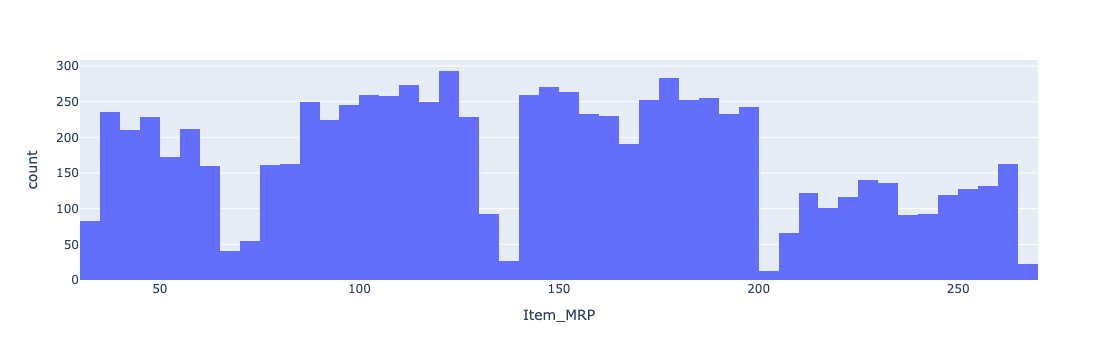

In [16]:
fig= px.histogram(df, x= 'Item_MRP')
fig.show()

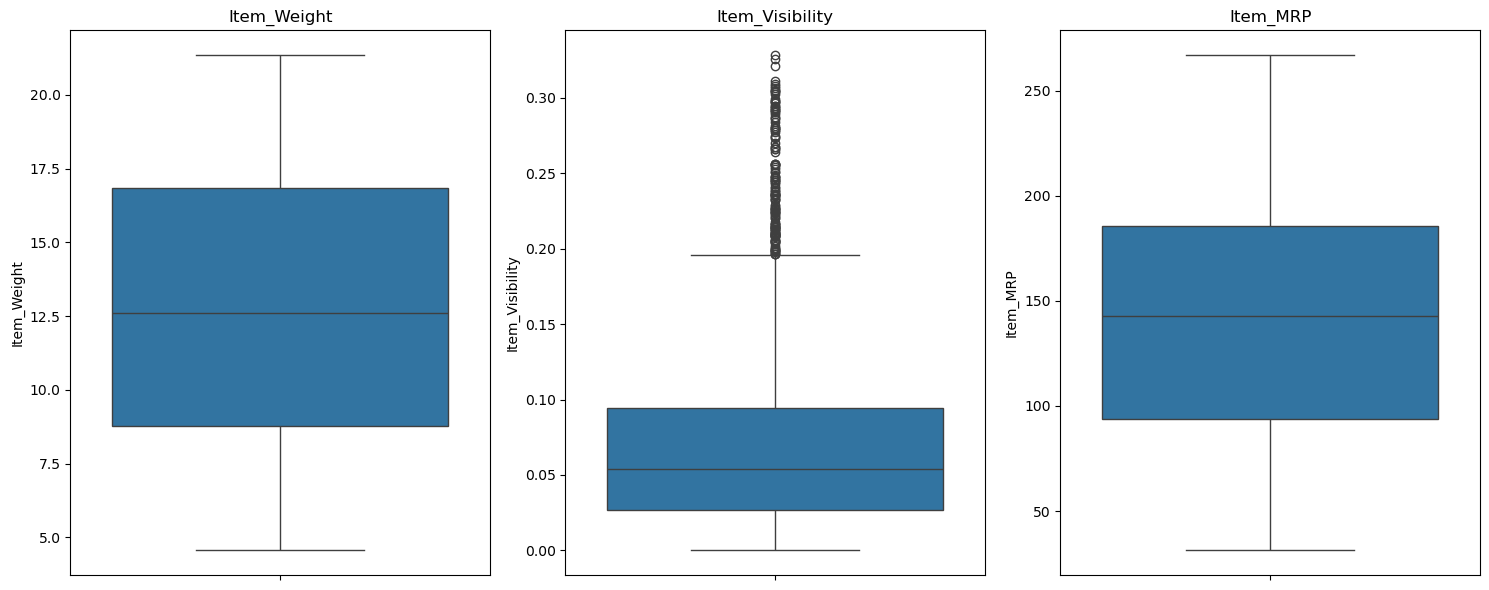

In [17]:
plt.figure(figsize=(15, 6))

for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 3, i) 
    sns.boxplot(y= col, data= df)
    plt.title(f"{col}")

plt.tight_layout()
plt.show()

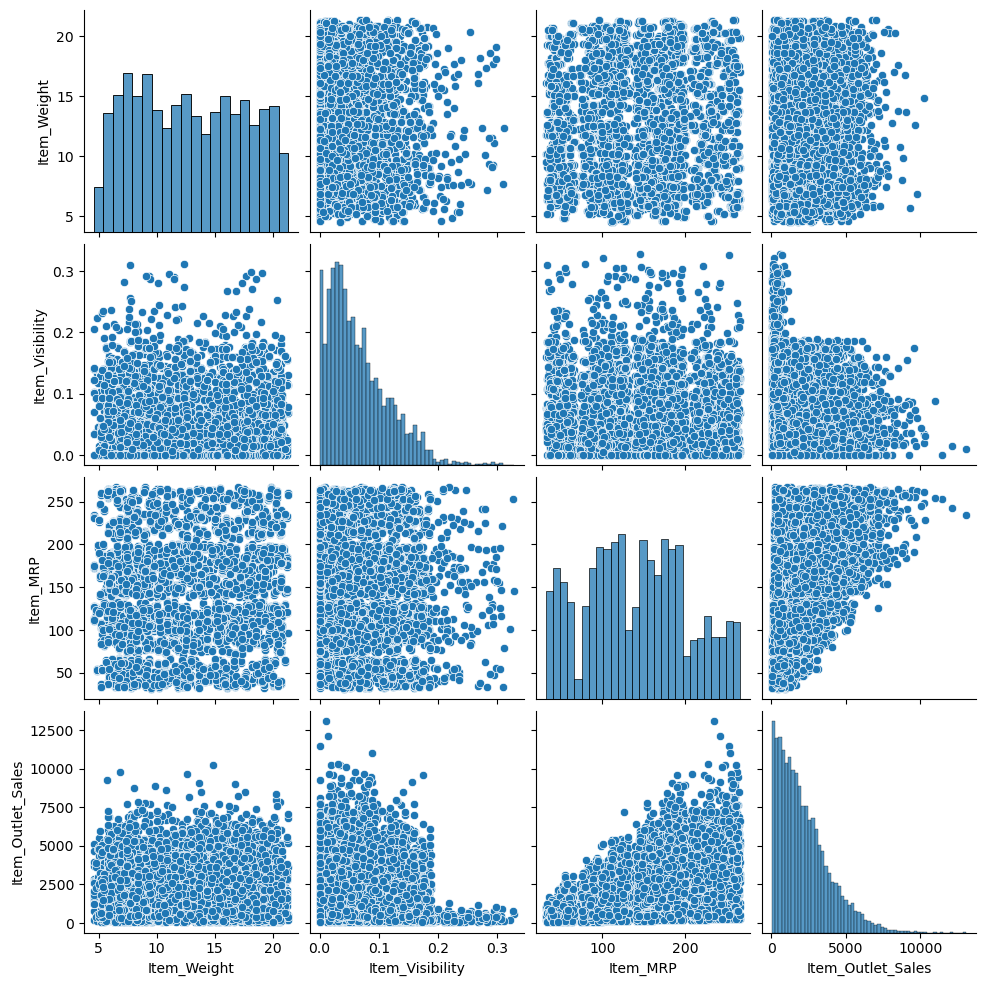

In [18]:
sns.pairplot(data= df[num_cols+ [y]])

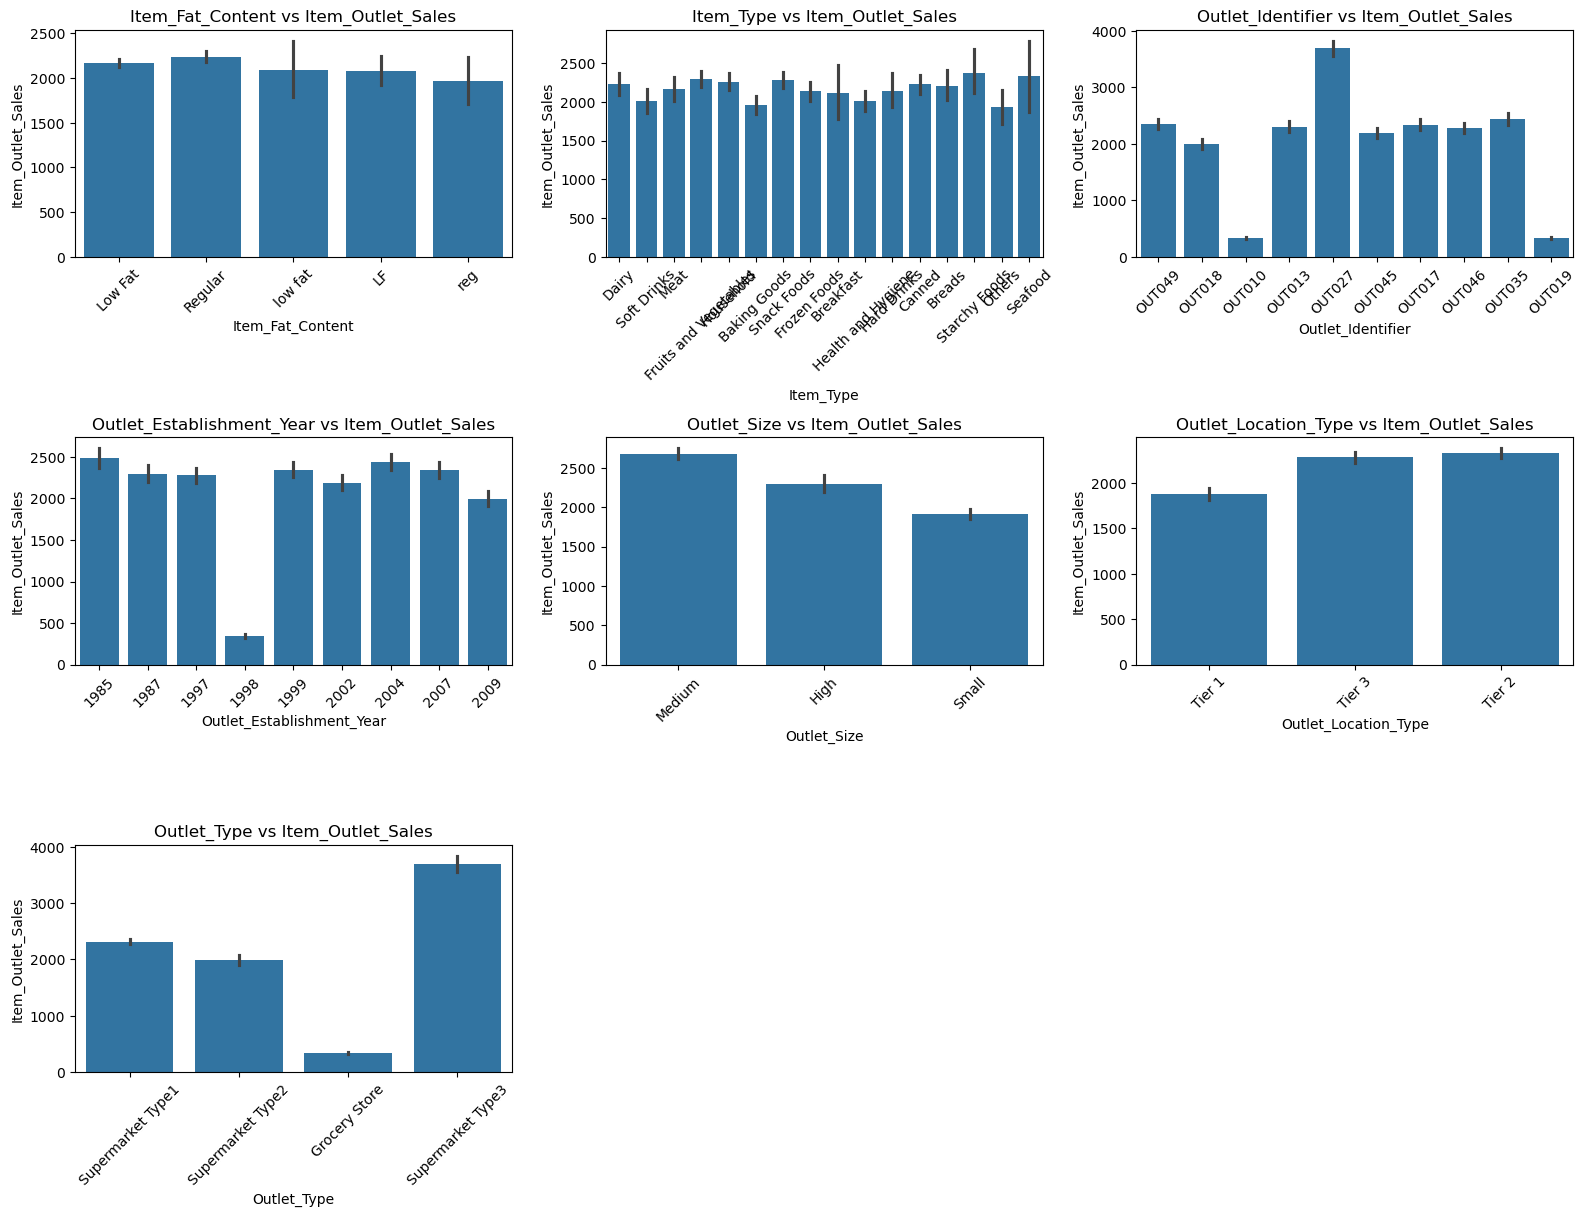

In [19]:
plt.figure(figsize=(16, 15))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(4, 3, i) 
    sns.barplot(x=col, y= y, data=df, estimator= lambda x: sum(x)/len(x))
    plt.xticks(rotation=45)
    plt.title(f"{col} vs {y}")

plt.tight_layout()
plt.show()

### Preprocessing & Treating Missing Values

In [21]:

def Preprocessing(dataset):
    dataset['Item_Weight'].fillna(dataset['Item_Weight'].mean(), inplace= True)
    dataset['Outlet_Size'] = dataset.groupby('Outlet_Type')['Outlet_Size'].transform(lambda x: x.fillna(x.mode()[0]))
    dataset['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'}, inplace= True)
    return dataset
    

In [22]:
# Define mapping
food_items = ['Dairy', 'Meat', 'Fruits and Vegetables', 'Snack Foods',
              'Breads', 'Breakfast', 'Frozen Foods', 'Canned', 'Starchy Foods']
drink_items = ['Soft Drinks', 'Hard Drinks']
non_consumables = ['Household', 'Health and Hygiene', 'Others']

def categorize_item(item):
    if item in food_items:
        return 'Food'
    elif item in drink_items:
        return 'Drinks'
    else:
        return 'Non-Consumables'

#####################################################################################
#FEATURE ENGINEERING
#####################################################################################

def FeatureEng(dataset):
    dataset['Item_Category'] = dataset['Item_Type'].apply(categorize_item)
    dataset['Outlet_Age']= 2013- dataset['Outlet_Establishment_Year']
    dataset['MRP_Bucket'] = pd.cut(dataset['Item_MRP'], 
                          bins=[0, 65, 135, 200, 270], 
                          labels=['Low', 'Medium', 'High', 'Very_High'])

    dataset['Weight_Bucket']= pd.cut(dataset['Item_Weight'], 
                          bins=[0, 12, 13, 22], 
                          labels=['Low', 'Mode', 'High'])

    dataset['Visibility_Bucket']= pd.cut(dataset['Item_Visibility'], 
                          bins=[0, 0.03, 0.08, 0.4], 
                          labels=['Low', 'Medium', 'High'])

    dataset['Item_Visibility_Log']= np.log(dataset['Item_Visibility'])
    dataset['Item_Visibility_Log']= np.where(dataset['Item_Visibility_Log']< np.quantile(dataset['Item_Visibility_Log'], 0.25), 
                                    np.quantile(dataset['Item_Visibility_Log'], 0.25), dataset['Item_Visibility_Log'])

    return dataset
    

In [23]:
df= Preprocessing(df)
df= FeatureEng(df)

In [24]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Item_Category', 'Outlet_Age',
       'MRP_Bucket', 'Weight_Bucket', 'Visibility_Bucket',
       'Item_Visibility_Log'],
      dtype='object')

In [25]:
final_cat_features= ['Item_Fat_Content', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type',
                     'Outlet_Type', 'Item_Category', 'Outlet_Age', 'MRP_Bucket', 'Weight_Bucket', 'Visibility_Bucket'
                    ]
final_num_features= ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Visibility_Log']

In [26]:
df[final_cat_features].nunique()

Item_Fat_Content         2
Outlet_Identifier       10
Outlet_Size              3
Outlet_Location_Type     3
Outlet_Type              4
Item_Category            3
Outlet_Age               9
MRP_Bucket               4
Weight_Bucket            3
Visibility_Bucket        3
dtype: int64

### Preparing dataset for modelling

In [28]:
df_final= df[final_cat_features+ final_num_features+ ['Item_Outlet_Sales']]

In [29]:
label= LabelEncoder()
df_final['Outlet_Identifier']= label.fit_transform(df_final['Outlet_Identifier'])

df_final= pd.get_dummies(df_final, columns= list(set(final_cat_features)- set(['Outlet_Identifier', 'Outlet_Age'])), dtype= int)

In [30]:
df_final.to_csv('Files/model_dataset.csv', index= False)